In [2]:
import pandas as pd
import numpy as np

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Embedding, SpatialDropout1D, LSTM, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Activation, Dropout
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt

from imblearn.over_sampling import SMOTE
from collections import Counter


/Users/salmazainana/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
def graph_plots(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.savefig(string + '.png')
    plt.show()

In [4]:
df = pd.read_csv('cleaned_dataset.csv')
df.columns

Index(['type', 'posts', 'cleaned_posts'], dtype='object')

In [8]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df['cleaned_posts'])
tokenizer.word_index # Get our learned vocabulary
word_index = tokenizer.word_index

VOCAB_SIZE = len(word_index)+1 # Total words

In [9]:
X = tokenizer.texts_to_sequences(df['cleaned_posts'])
MAX_SEQ_LENGTH = max(len(seq) for seq in X)
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen= MAX_SEQ_LENGTH, padding = 'post') # Pad the sequence to the same length to make it uniform
X.shape

(8675, 957)

In [10]:
labels = LabelEncoder().fit_transform(df.type)


In [11]:
smote = SMOTE(random_state=42, k_neighbors=1)
X_res, y_res = smote.fit_resample(X,labels)
X_res.shape, y_res.shape


((29312, 957), (29312,))

In [12]:
unique, counts = np.unique(y_res, return_counts=True)
print(dict(zip(unique, counts)))

{0: 1832, 1: 1832, 2: 1832, 3: 1832, 4: 1832, 5: 1832, 6: 1832, 7: 1832, 8: 1832, 9: 1832, 10: 1832, 11: 1832, 12: 1832, 13: 1832, 14: 1832, 15: 1832}


In [ ]:
embedding_size = 300 
dropout_rate = 0.1 

# BEST RNN with dropout layers and one hot encoded labels
y_one_hot = pd.get_dummies(y_res)   # One hot encode the target variable
X_train, X_test, y_train, y_test = train_test_split(X_res, y_one_hot, test_size=0.2, random_state=1234)
n_classes = len(y_one_hot.columns)

model_rnn = Sequential()
model_rnn.add(Embedding(VOCAB_SIZE, embedding_size, input_length= MAX_SEQ_LENGTH))
model_rnn.add(SimpleRNN(100))
model_rnn.add(Dropout(dropout_rate))
model_rnn.add(Dense(n_classes, activation='softmax'))
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history =model_rnn.fit(X_train,y_train,
                        epochs =100, verbose=0,
                        validation_split = 0.01,
                        callbacks=[
                        EarlyStopping(monitor='val_loss',
                                        patience=3,
                                        min_delta=1e-5)])


In [19]:

#save model 
model_rnn.save('best_simple_rnn_model.model')

INFO:tensorflow:Assets written to: best_simple_rnn_model.model/assets


INFO:tensorflow:Assets written to: best_simple_rnn_model.model/assets


## Word2Vec

In [31]:
from gensim.models import Word2Vec
from tqdm import trange
from gensim.test.utils import common_texts
from gensim.models import Word2Vec


In [90]:
#!pip3 install wget

In [14]:
import os
import wget
import gzip
import shutil

gn_vec_zip_path ="/Users/salmazainana/Downloads/GoogleNews-vectors-negative300.bin"


In [15]:
from gensim.models import Word2Vec, KeyedVectors

model = KeyedVectors.load_word2vec_format(gn_vec_zip_path, binary=True)


In [16]:
model.save("word2vec.model")

In [17]:
word2vec_model = model

In [18]:
embedding_size = 300
embedding_matrix = np.zeros((VOCAB_SIZE, embedding_size))
# for word, i in tokenizer.word_index.items():
#     if word in word2vec_model.wv:
#         embedding_vector = word2vec_model.wv[word]
#         if embedding_vector is not None:
#             embedding_matrix[i] = embedding_vector

for word, i in tokenizer.word_index.items():
    if word in word2vec_model:  # Use word2vec_model directly instead of word2vec_model.wv
        embedding_vector = word2vec_model[word]  # Same here
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            
embedding_matrix.shape

(135303, 300)

In [125]:
embedding_matrix[1]

array([-0.03662109,  0.01452637,  0.03515625,  0.23046875, -0.20800781,
        0.26171875, -0.13183594, -0.08740234,  0.07519531,  0.03881836,
       -0.19726562, -0.37109375, -0.22460938, -0.05029297,  0.14648438,
        0.08398438, -0.0625    ,  0.3828125 ,  0.05664062, -0.09277344,
       -0.20898438,  0.11035156,  0.36132812,  0.28710938, -0.15332031,
       -0.16113281, -0.3828125 , -0.05395508, -0.140625  , -0.29101562,
        0.18261719,  0.09326172, -0.19628906, -0.00500488, -0.07910156,
        0.296875  , -0.38085938,  0.44335938,  0.3671875 ,  0.20117188,
        0.07568359, -0.25585938,  0.1953125 ,  0.10253906,  0.23730469,
        0.00772095,  0.1875    , -0.20117188, -0.09277344,  0.10107422,
        0.0246582 ,  0.18457031,  0.19824219,  0.19140625, -0.05419922,
        0.13476562,  0.00506592,  0.10644531, -0.05322266, -0.18945312,
       -0.10498047, -0.01611328, -0.26171875,  0.05004883, -0.04882812,
       -0.3046875 , -0.00799561, -0.14257812, -0.359375  ,  0.36

In [130]:
# from tensorflow.keras.models import Word2Vec


In [35]:
y_one_hot = pd.get_dummies(y_res)
n_classes = y_one_hot.shape[1]

# Word2Vec with Simple RNN

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_one_hot, test_size=0.2, random_state=42, shuffle=True)



In [131]:
rate = 0.8
rnn_w2v_model = Sequential()
rnn_w2v_model.add(Embedding(VOCAB_SIZE, embedding_size, input_length=MAX_SEQ_LENGTH, weights=[embedding_matrix], trainable=False))
rnn_w2v_model.add(SimpleRNN(100))
rnn_w2v_model.add(Dropout(rate))
rnn_w2v_model.add(Dense(n_classes, activation='softmax'))
rnn_w2v_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [132]:
history =rnn_w2v_model.fit(X_train,y_train, epochs =30, batch_size =68, verbose=0,
                        validation_split = 0.1, 
                        callbacks=[
                        EarlyStopping(monitor='val_loss',
                                        patience=10,
                                        min_delta=1e-5)])
print('------------------------- For embedding size of :', embedding_size, 'and dropout rate of :', rate)


------------------------- For embedding size of : 300 and dropout rate of : 0.8


In [134]:
rnn_w2v_model.save('rnn_w2v_model.model')

INFO:tensorflow:Assets written to: rnn_w2v_model.model/assets


INFO:tensorflow:Assets written to: rnn_w2v_model.model/assets


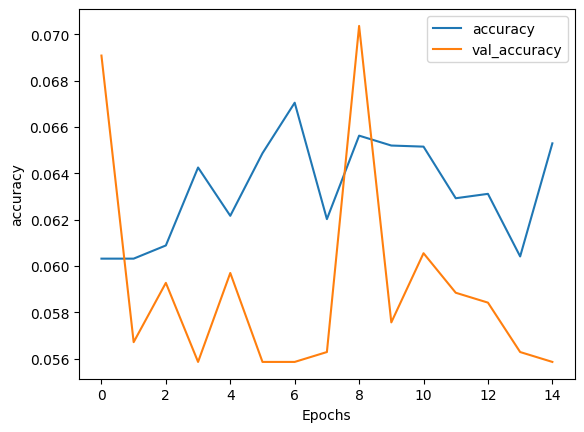

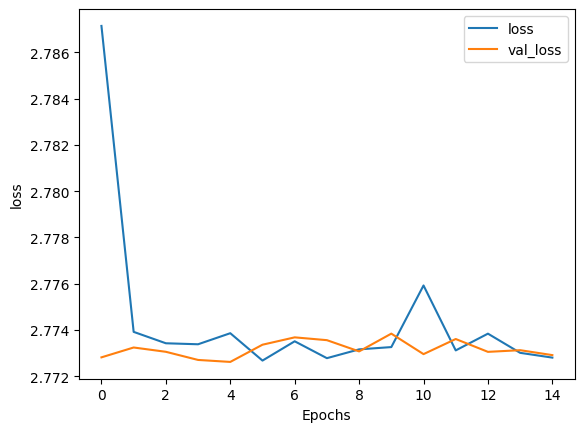

In [135]:
graph_plots(history, "accuracy")
graph_plots(history, "loss")

In [149]:

y_pred = model_rnn.predict(X_test)
# print(y_pred)
y_pred = np.argmax(y_pred, axis=1)
# print(y_pred)
# print(y_test)
y_test = np.argmax(y_test.values, axis=1)
# print(y_test)
accuracy = accuracy_score(y_test, y_pred)


184/184 [==============================] - 11s 62ms/step


In [137]:
accuracy

0.06327818522940475

# with regularization L2

In [25]:
from keras import regularizers


In [143]:
from keras import regularizers

model = Sequential([
        Embedding(VOCAB_SIZE, 300, embeddings_regularizer=regularizers.l2(0.01), input_length= MAX_SEQ_LENGTH),
        Dropout(0.1),
        SimpleRNN(100, kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.1), 
        Dense(n_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.01))
        ])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [144]:
history =model.fit(X_train,y_train, epochs =30, batch_size =124, verbose=0,
                        validation_split = 0.2, 
                        callbacks=[
                        EarlyStopping(monitor='val_loss',
                                        patience=10,
                                        min_delta=1e-5)])

print('------------------------- For embedding size of :', 300, 'and dropout rate of :', 0.1)


------------------------- For embedding size of : 300 and dropout rate of : 0.1


In [145]:
model.save('rnn_w2v_l2_model.model')

INFO:tensorflow:Assets written to: rnn_w2v_l2_model.model/assets


INFO:tensorflow:Assets written to: rnn_w2v_l2_model.model/assets


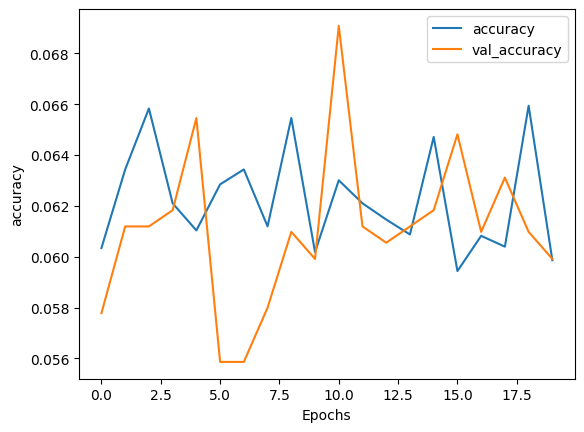

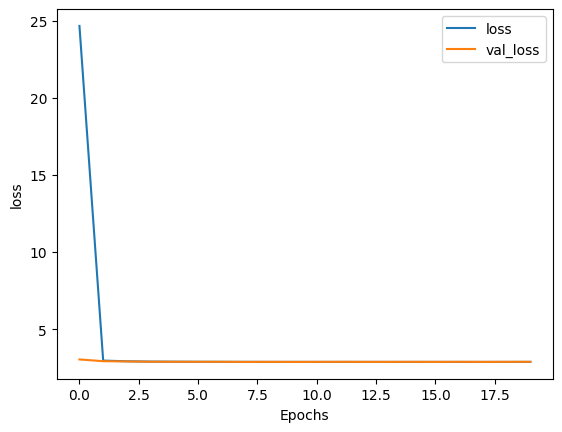

In [153]:
graph_plots(history, "accuracy")
graph_plots(history, "loss")

In [152]:
y_pred = model_rnn.predict(X_test)
# print(y_pred)
y_pred = np.argmax(y_pred, axis=1)
# print(y_pred)
# print(y_test)
y_test = np.argmax(y_test.values, axis=1)
# print(y_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

184/184 [==============================] - 11s 61ms/step


0.06327818522940475

## Word2Vec with LSTM

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_one_hot, test_size=0.2, random_state=42, shuffle=True)


In [158]:
rate = 0.8
LSTM_w2v_model = Sequential()
LSTM_w2v_model.add(Embedding(VOCAB_SIZE, embedding_size, input_length=MAX_SEQ_LENGTH, weights=[embedding_matrix], trainable=False))
LSTM_w2v_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
LSTM_w2v_model.add(Dropout(rate))
LSTM_w2v_model.add(Dense(n_classes, activation='softmax'))
LSTM_w2v_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [159]:
history =LSTM_w2v_model.fit(X_train,y_train, epochs =10, batch_size =64, verbose=0,
                        validation_split = 0.1, 
                        callbacks=[
                        EarlyStopping(monitor='val_loss',
                                        patience=10,
                                        min_delta=1e-5)])
print('------------------------- For embedding size of :', embedding_size, 'and dropout rate of :', rate)

------------------------- For embedding size of : 300 and dropout rate of : 0.8


INFO:tensorflow:Assets written to: LSTM_w2v_model.model/assets


INFO:tensorflow:Assets written to: LSTM_w2v_model.model/assets


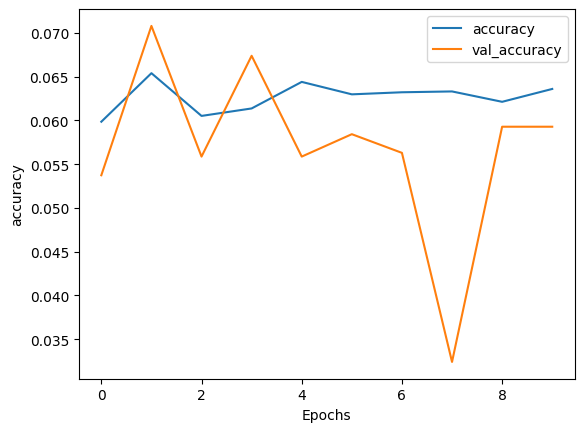

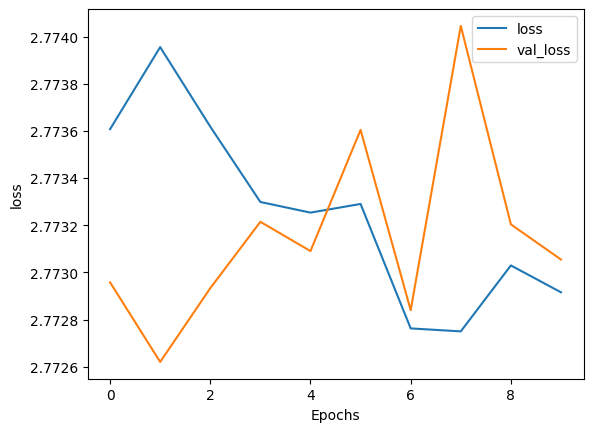

In [160]:
LSTM_w2v_model.save('LSTM_w2v_model.model')

graph_plots(history, "accuracy")
graph_plots(history, "loss")


In [161]:
y_pred = model_rnn.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test.values, axis=1)
accuracy = accuracy_score(y_test, y_pred)
accuracy

184/184 [==============================] - 8s 45ms/step


0.06327818522940475

### Grid Search for LSTM 

In [1]:
def build_model(hp):
    embedding_size = 300
    dropout_rate1 = hp.Float('dropout_rate', min_value=0.1, max_value=0.8, step=0.2)
    dropout_rate2 = hp.Float('dropout_rate', min_value=0.2, max_value=0.8, step=0.2)
    l2_rate = hp.Float('l2_rate', min_value=0.0, max_value=0.05, step=0.01)

    model= Sequential([
        Embedding(VOCAB_SIZE, embedding_size, weights=[embedding_matrix], input_length= MAX_SEQ_LENGTH),
        LSTM(256, dropout=dropout_rate1, recurrent_dropout=dropout_rate1,return_sequences=True),
        Dropout(dropout_rate2), 
        LSTM(256, dropout=dropout_rate1, recurrent_dropout=dropout_rate1,return_sequences=True),
        Dropout(dropout_rate2), 
        LSTM(512, dropout=dropout_rate1, recurrent_dropout=dropout_rate1,return_sequences=False),
        Dropout(dropout_rate2), 
        Dense(n_classes, activation='relu'),
        Dense(n_classes, activation='softmax', kernel_regularizer=regularizers.l2(l2_rate))
        ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model



In [38]:
import keras_tuner as kt

In [39]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Set to a reasonable number to limit search time
    executions_per_trial=1,  # How many models to build for each trial
    directory='/Users/salmazainana/mbti-cs229',  # Directory where the search results will be saved
    project_name='keras_tuner_demo_3'
)

In [40]:
tuner.search(X_train, y_train, 
             epochs=10, 
             batch_size= 128,
             validation_split = 0.2, 
             callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-4)])


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
0.7               |0.7               |dropout_rate
0.02              |0.02              |l2_rate

Epoch 1/10
147/147 [==============================] - 4461s 30s/step - loss: 67.3524 - accuracy: 0.0623 - val_loss: 2.8694 - val_accuracy: 0.0610
Epoch 2/10
147/147 [==============================] - 3459s 24s/step - loss: 2.8305 - accuracy: 0.0647 - val_loss: 2.8024 - val_accuracy: 0.0610
Epoch 3/10
147/147 [==============================] - 5480s 37s/step - loss: 2.7920 - accuracy: 0.0630 - val_loss: 2.7834 - val_accuracy: 0.0610
Epoch 4/10
104/147 [====================>.........] - ETA: 24:48 - loss: 2.7782 - accuracy: 0.0666

In [5]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.get_best_models(num_models=1)[0]

model.save('best_model_lSTM_l2.h5')

NameError: name 'tuner' is not defined

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_int = np.argmax(y_test.values, axis=1) # Convert one hot encoded y_test back to categorical
accuracy = accuracy_score(y_test_int, y_pred)
print("Accuracy:", accuracy)

In [183]:
y_pred

array([11, 11, 11, ..., 11, 11, 11])

In [184]:
y_test

array([ 6, 14,  7, ..., 10, 14,  9])